### Table of Contents

* [Background](#Background)

* [Problem Statement](#Problem_statement)

* [Importing](#Loading_libraries_and_data)

* [Exploring the Data](#Exploring_the_date)

* [Train-Test Split](#The_train-test_split)

* [Balancing The Training Set](#Balancing_the_training_set)

* [Modeling on the Unbalanced Training Set](#Training_classifiers_on_the_original_imbalanced_dataset)

* [Modeling on the SMOTE Balanced Training Set](#Training_classifiers_on_the_SMOTE_balanced_dataset)

* [Modeling on the ADASYN Balanced Training Set](#Training_classifiers_on_the_ADASYN_balanced_dataset)

* [Modeling on the DB-SMOTE Balanced Training Set](#Training_classifiers_on_the_DB-SMOTE_balanced_dataset)

* [Results](#Comparing_model_performance)

* [Conclusion](#Conclusion)


### Background <a class="anchor" id="Background"></a>

#### Balancing a Dataset

Balancing a dataset can have its pros and cons. 
* Balanced data is good for classification, but you lose information on appearance frequencies.
* Frequent cases will get fewer missclassifications. 
* By balancing the data the accuracy estimate is itself getting biased.

If one has enough data, the class imbalance problem wouldn't arise. We will compare results from an unbalanced dataset and a balanced one.
  

#### Correlation effect on modeling


* Correlation can help predict one attribute from another - useful in imputing missing values.

* Correlation can lead to discovery of a causal relationship.

* It is a basic quantity for many modeling techniques.

* *However*, in general features which are highly correlated together (between features not response), should be removed as they are redundant and can hinder algorithm performance.

#### Data Reduction


Data reduction can:
* Decrease training time.
* Allow easier visual-understanding.
* Minimizing information loss.

A well known technique for data reduction is principal component analysis (**PCA**). 



 Correlation and collinearity of the input matrix are to be considered aberrations; They introduce redundant information. 
 
 By isolating clusters of correlated variables to preserve the 'variability', theres reduced dimensonality of the dataset. This feature selection also can reduce overfitting. 



#### Balancing algorithm

##### Smotefamily

SMOTE (Synthetic Minority Oversampling Technique), is a algorithm to balance datasets. The idea is to generate new samples using nearest neighbors. Accomplished by members of the Smotefamily library.

https://www.rdocumentation.org/packages/DMwR/versions/0.4.1/topics/SMOTE

#### Linear discriminant analysis (LDA)

LDA seeks to find  linear combination of features that characterizes or seperates two or more classes of objects/events. The resutling sum can be used as a liner classifier (decision model based on a linear combination of the feature values) or for dimensionality reduction before classification.

##### Relationship to ANOVA

* ANOVA uses categorical indepedent variables, and a continuous depdendent variable. 

* Discriminant analysis has continuous independent variables and a categorical depedent variable (in this project: the class label).


##### Relationship to PCA and factor analysis

* LDA is closely related to PCA and factor analysis. Thhey both look for linear combinations of variables that best explain the data.

* LDA models the difference between the classes of data. PCA dont not take into account any difference in class. Factor analysis builds the feature combinations based on differences rather than similarities.

* Discriminant analysis is used when groups are known a priori.

* These methods can be understood as partitioning multi-dimensional input spaces by hyperplanes.

##### Performance measures

We will be measuring performance of each model using Precision, Recall, and the F-measure. 

Accuracy is a bad metric in the case of imbalanced data because it cannot distinguish between Type I and Type II errors (false positives and false negatives).


Precision measures the proportion of positive cases that are truly positive.
$$ precision = \frac{TP}{(TP+FP)}$$

*Recall* measures how complete the results are. This is also called the *Sensitivity*

$$ recall = \frac{TP}{(TP+FN)} $$

The $F_{1}$-score (F-measure) combines the precision and recall into a single number. An $F_{1}$-score of $1.0$ indicates perfect precision and recall.

$$ F_{1} = 2 * \frac{(precision*recall)}{(precision + recall)} $$

### 1. Problem statement  <a class="anchor" id="Problem_statement"></a>

#### We will use R to fit different classification models to a highly imbalanced dataset. 

* Decision Tree
* Naive Bayers Classifier
* Linear Discriminant Analysis

#### Goal : Prediciting fraudulent credit card transactions.

### 2. Loading libraries and data <a class="anchor" id="Loading_libraries_and_data"></a>

In [1]:
library(caret)
library(corrplot)
library(smotefamily)
library(naivebayes)

Loading required package: ggplot2

Loading required package: lattice

corrplot 0.92 loaded

naivebayes 0.9.7 loaded



In [2]:
data <- read.csv("creditcardFraud.csv")



**class is a factor variable, indicating yes for a fraudulent transaction, no for a non-fraudulent transaction**

In [3]:
data$class<-as.factor(data$class)

### 3. Exploring the data <a class="anchor" id="Exploring_the_data"></a>

#### At a glimpse

In [4]:
dplyr::glimpse(data)

Rows: 49,692
Columns: 31
$ Time   <int> 406, 472, 4462, 6986, 7519, 7526, 7535, 7543, 7551, 7610, 7672,~
$ V1     <dbl> -2.312226542, -3.043540624, -2.303349568, -4.397974442, 1.23423~
$ V2     <dbl> 1.9519920, -3.1573071, 1.7592475, 1.3583670, 3.0197404, 4.13783~
$ V3     <dbl> -1.6098507, 1.0884628, -0.3597447, -2.5928442, -4.3045969, -6.2~
$ V4     <dbl> 3.997906, 2.288644, 2.330243, 2.679787, 4.732795, 6.675732, 6.3~
$ V5     <dbl> -0.52218787, 1.35980513, -0.82162833, -1.12813094, 3.62420083, ~
$ V6     <dbl> -1.42654532, -1.06482252, -0.07578757, -1.70653639, -1.35774566~
$ V7     <dbl> -2.5373873, 0.3255743, 0.5623198, -3.4961973, 1.7134450, -1.631~
$ V8     <dbl> 1.39165725, -0.06779365, -0.39914658, -0.24877774, -0.49635849,~
$ V9     <dbl> -2.7700893, -0.2709528, -0.2382534, -0.2477679, -1.2828578, -2.~
$ V10    <dbl> -2.7722721, -0.8385866, -1.5254116, -4.8016374, -2.4474693, -6.~
$ V11    <dbl> 3.2020332, -0.4145754, 2.0329122, 4.8958442, 2.1013439, 5.66439~
$ V12    <dbl> 

#### Missing values

In [5]:
# There are no missing values in the dataset.

sum(is.na(data))

[1] 0

#### What is the distribution of the response variable?

In [6]:
summary(data$class)

no   yes 
49200   492

In [7]:
prop.table(table(data$class))


        no        yes 
0.99009901 0.00990099 

#### Whats the distribution of each of the input variables?

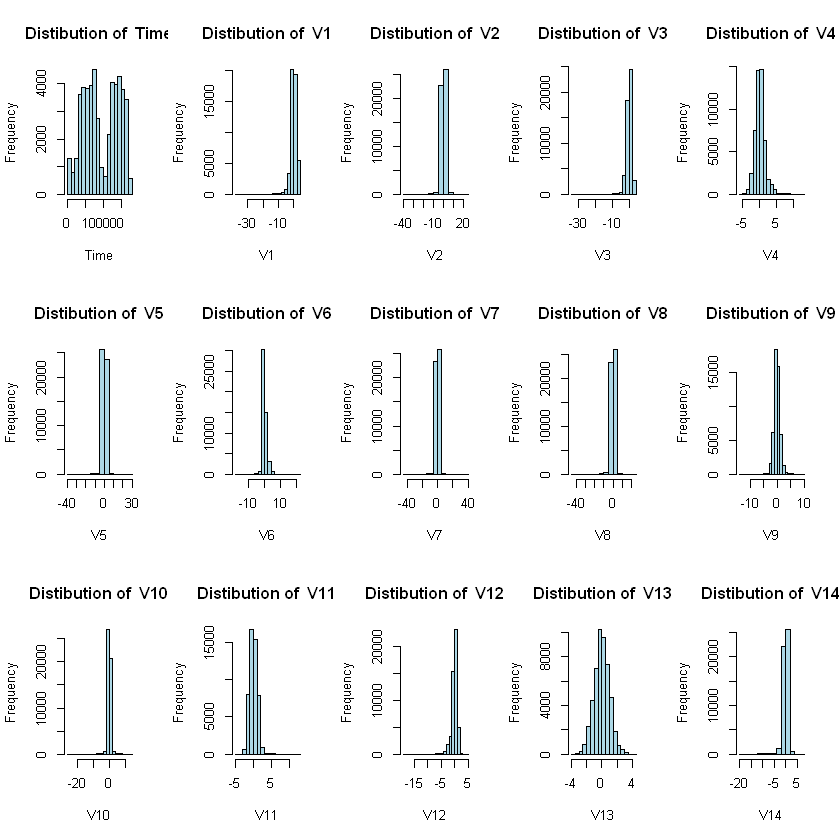

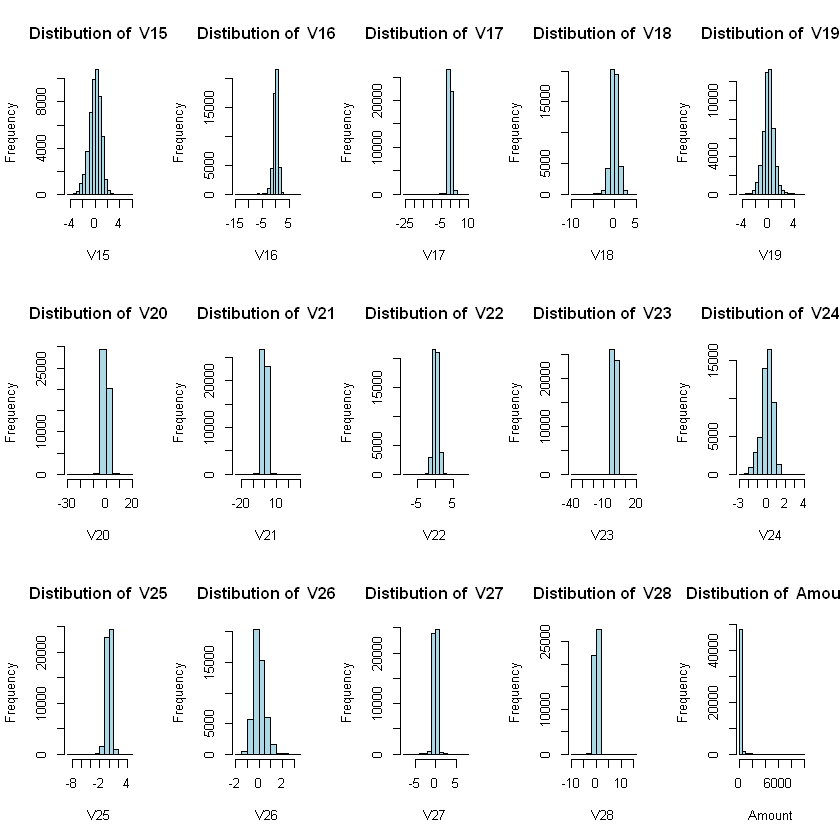

In [8]:
par (mfrow= c(3,5))
i <- 1
for (i in 1:30) 
{
    hist((data[,i]), main = paste("Distibution of ", colnames(data[i])), 
         xlab = colnames(data[i]), col = "light blue")
}


#### Correlation

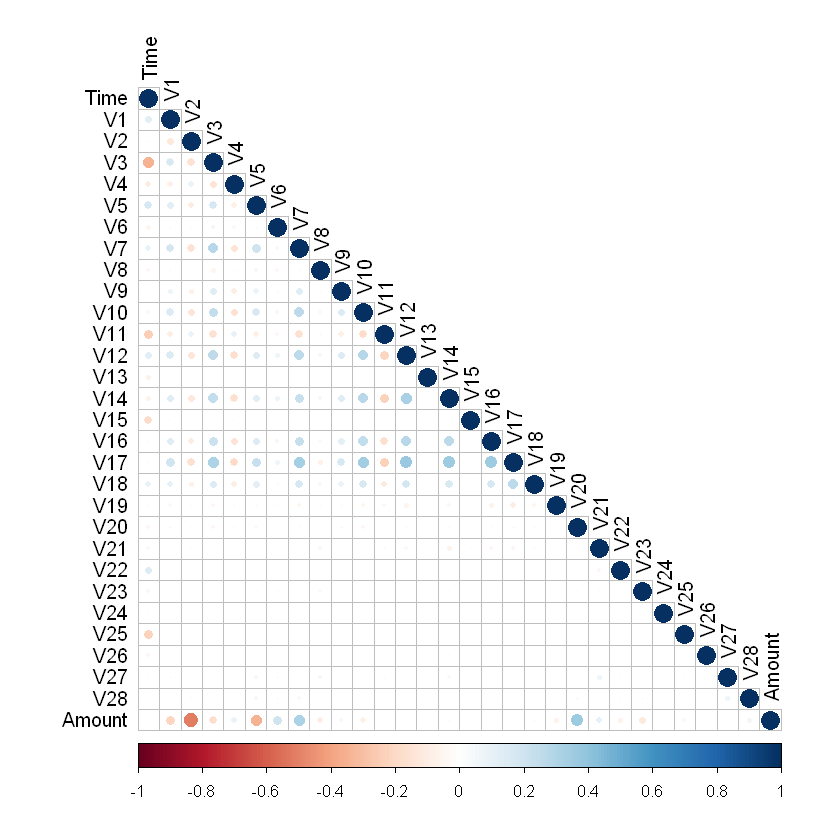

In [9]:
r <- cor(data[,1:30])
corrplot(r, type="lower", tl.col="black")

### 4. The train-test split <a class="anchor" id="The_train-test_split"></a>

In [10]:
set.seed(1337)


In [11]:
train <- caret::createDataPartition(data$class, p=.70, times = 1, list =F)

In [12]:
# The training dataset ( original unbalanced dataset)


train_original <- data[train,]
train_original

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,406,-2.31222654,1.9519920,-1.6098507,3.997906,-0.52218787,-1.4265453,-2.53738731,1.39165725,-2.7700893,...,0.5172324,-0.035049369,-0.465211076,0.32019820,0.04451917,0.17783980,0.26114500,-0.14327587,0.00,yes
2,472,-3.04354062,-3.1573071,1.0884628,2.288644,1.35980513,-1.0648225,0.32557427,-0.06779365,-0.2709528,...,0.6616959,0.435477209,1.375965743,-0.29380315,0.27979803,-0.14536172,-0.25277312,0.03576422,529.00,yes
5,7519,1.23423505,3.0197404,-4.3045969,4.732795,3.62420083,-1.3577457,1.71344499,-0.49635849,-1.2828578,...,-0.3790683,-0.704181032,-0.656804756,-1.63265296,1.48890145,0.56679727,-0.01001622,0.14679274,1.00,yes
7,7535,0.02677923,4.1324639,-6.5606000,6.348557,1.32966567,-2.5134788,-1.68910220,0.30325280,-3.1394091,...,0.3705087,-0.576752473,-0.669605372,-0.75990753,1.60505555,0.54067540,0.73704038,0.49669911,1.00,yes
8,7543,0.32959433,3.7128893,-5.7759351,6.078266,1.66735901,-2.4201684,-0.81289125,0.13308012,-2.2143113,...,0.1566172,-0.652450441,-0.551572219,-0.71652163,1.41571662,0.55526474,0.53050739,0.40447405,1.00,yes
9,7551,0.31645900,3.8090759,-5.6151590,6.047445,1.55402596,-2.6513531,-0.74657927,0.05558631,-2.6786785,...,0.2088284,-0.511746619,-0.583813221,-0.21984503,1.47475258,0.49119193,0.51886829,0.40252807,1.00,yes
10,7610,0.72564574,2.3008944,-5.3299762,4.007683,-1.73041059,-1.7321926,-3.96859262,1.06372815,-0.4860966,...,0.5896691,0.109541319,0.601045277,-0.36470028,-1.84307769,0.35190930,0.59454998,0.09937224,1.00,yes
11,7672,0.70270990,2.4264328,-5.2345133,4.416661,-2.17080622,-2.6675536,-3.87808845,0.91133712,-0.1661990,...,0.5511797,-0.009802357,0.721698230,0.47324575,-1.95930377,0.31947554,0.60048492,0.12930522,1.00,yes
12,7740,1.02387387,2.0014853,-4.7697518,3.819195,-1.27175423,-1.7346624,-3.05924503,0.88980479,0.4153821,...,0.3432826,-0.054195664,0.709653952,-0.37221587,-2.03206837,0.36677760,0.39517067,0.02020554,1.00,yes


In [13]:
# The unbiased validation set

test <- data[-train,]
# test

#### The proportion of observations allocated to each group (70-30)

In [14]:

dim(train_original)/dim(data)

[1] 0.7000121 1.0000000

In [15]:
dim(test)/dim(data)

[1] 0.2999879 1.0000000

#### Class balance within the training dataset

In [16]:
prop.table(table(train_original$class))


         no         yes 
0.990081932 0.009918068 

#### Class balance within the testing dataset

In [17]:
prop.table(table(train_original$class))


         no         yes 
0.990081932 0.009918068 


* **Both sets of data are unbalanced (99.0081% no)**

### 5. Balancing the training set <a class="anchor" id="Balancing_the_training_set"></a>

#### SMOTE Balanced

In [18]:
train_smote <- smotefamily::SMOTE(train_original[,-31], train_original[,31], K=5)

In [19]:
names(train_smote)

[1] "data"     "syn_data" "orig_N"   "orig_P"   "K"        "K_all"   
 [7] "dup_size" "outcast"  "eps"      "method"

In [20]:
# Assigning the data
train_smote <- train_smote$data

In [21]:
train_smote$class <- as.factor(train_smote$class)

#### ADASYN ( Adaptive Synthetic Sampling)

In [22]:
train_adas <- smotefamily::ADAS(train_original[,-31], train_original[,31], K=5)

In [23]:
train_adas <- train_adas$data

In [24]:
train_adas$class <- as.factor(train_adas$class)


#### DB-SMOTE ( Densty-based SMOTE)

In [25]:
train_db <- smotefamily::ADAS(train_original[,-31], train_original[,31], K=5)

In [26]:
train_db <- train_db$data

In [27]:
train_db$class <- as.factor(train_db$class)

#### The class distribution of the balanced datasets

In [28]:
prop.table(table(train_smote$class))


       no       yes 
0.5020774 0.4979226 

In [29]:
prop.table(table(train_adas$class))


       no       yes 
0.4993041 0.5006959 

In [30]:
prop.table(table(train_db$class))


       no       yes 
0.4993041 0.5006959 

**We have balanced the proportion of cases available for each class of the problem**

### 6. Training classifiers on the original imbalanced dataset <a class="anchor" id="Training_classifiers_on_the_original_imbalanced_dataset"></a>

#### Setting the global train control parameters

We will be using cross validation 10 times.

In [31]:
control <- caret::trainControl(method= "cv", number = 10, classProbs = 10, 
                               summaryFunction = twoClassSummary)

#### Constructing models

##### Decision tree: original data

In [32]:
dt_original <- caret::train(class~., data=train_original, method="rpart", 
                     trControl = control, metric= "ROC")

##### Naive bayes regression: original data

In [33]:
nb_original <- caret::train(class~., data=train_original, method = "naive_bayes", 
                     trControl = control, metric= "ROC")

##### Linear discriminant analysis: originial data

In [34]:
lda_original <- caret::train(class~., data=train_original, method="lda", 
                     trControl = control, metric= "ROC")

#### Decision Tree

##### Predicting

In [35]:
dt_original_prediction  <- predict(dt_original, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [36]:
dt_original_test <- factor( ifelse(dt_original_prediction$yes>0.5, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (decision tree)

In [37]:
precision_dt_original <- caret::posPredValue(dt_original_test, test$class, positive = "yes")

recall_dt_original <- caret::sensitivity(dt_original_test, test$class, positive = "yes")

F1_dt_original <- 
(2*precision_dt_original*recall_dt_original) / (precision_dt_original+recall_dt_original)

In [38]:
precision_dt_original
recall_dt_original 

F1_dt_original

[1] 0.9296875

[1] 0.8095238

[1] 0.8654545

#### Naive bayes

##### Predicting

In [39]:
nb_original_prediction <- predict(nb_original, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [40]:
nb_original_test <- factor( ifelse(nb_original_prediction$yes>0.5, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (naive bayes)

In [41]:
precision_nb_original <- caret::posPredValue(nb_original_test, test$class, positive = "yes")

recall_nb_original <- caret::sensitivity(nb_original_test, test$class, positive = "yes")

F1_nb_original <- 
(2*precision_nb_original*recall_nb_original) / (precision_nb_original+recall_nb_original)

In [42]:
precision_nb_original
recall_nb_original

F1_nb_original

[1] 0.4738956

[1] 0.8027211

[1] 0.5959596

#### Linear discriminant analysis

##### Predicting

In [43]:
lda_original_prediction  <- predict(lda_original, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [44]:
lda_original_test <- factor( ifelse(lda_original_prediction$yes>0.5, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (LDA)

In [45]:
precision_lda_original <- caret::posPredValue(lda_original_test, test$class, positive = "yes")

recall_lda_original <- caret::sensitivity(lda_original_test, test$class, positive = "yes")

F1_lda_original <- 
(2*precision_lda_original*recall_lda_original) / (precision_lda_original+recall_lda_original)

In [46]:
precision_lda_original
recall_lda_original

F1_lda_original

[1] 0.9818182

[1] 0.7346939

[1] 0.8404669

### 7. Training classifiers on the SMOTE balanced dataset <a class="anchor" id="Training_classifiers_on_the_SMOTE_balanced_dataset"></a>

#### Constructing models

##### Decision tree: balanced dataset

In [47]:
dt_smote <- caret::train(class~., data=train_smote, method="rpart", 
                     trControl = control, metric= "ROC")

##### Naive bayes:  balanced dataset

In [48]:
nb_smote <- caret::train(class~., data=train_smote, method = "naive_bayes", 
                     trControl = control, metric= "ROC")

##### LDA:  balanced dataset

In [49]:
lda_smote <- caret::train(class~., data=train_smote, method="lda", 
                     trControl = control, metric= "ROC")

#### Decision tree

##### Predicting

In [50]:
dt_smote_pred <- predict(dt_smote, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [51]:
dt_smote_test <- factor(ifelse(dt_smote_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (decision tree: smote)

In [52]:
precision_dt_smote <- caret::posPredValue(dt_smote_test, test$class, positive = "yes")
recall_dt_smote <- caret::sensitivity(dt_smote_test, test$class, positive = "yes")

F1_dt_smote <- 
(2*precision_dt_smote*recall_dt_smote) / (precision_dt_smote+recall_dt_smote)


In [53]:
precision_dt_smote
recall_dt_smote

F1_dt_smote

[1] 0.1881481

[1] 0.8639456

[1] 0.3090024

#### Naive bayes

##### Predicting

In [54]:
nb_smote_pred <- predict(nb_smote, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [55]:
nb_smote_test <- factor(ifelse(nb_smote_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (naive bayes: smote)

In [56]:
precision_nb_smote <- caret::posPredValue(nb_smote_test, test$class, positive = "yes")
recall_nb_smote <- caret::sensitivity(nb_smote_test, test$class, positive = "yes")

F1_nb_smote <- 
(2*precision_nb_smote*recall_nb_smote) / (precision_nb_smote+recall_nb_smote)


In [57]:
precision_nb_smote
recall_nb_smote

F1_nb_smote

[1] 0.5514019

[1] 0.8027211

[1] 0.6537396

#### Linear discriminant analysis

##### Predicting

In [58]:
lda_smote_pred <- predict(lda_smote, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [59]:
lda_smote_test <- factor(ifelse(lda_smote_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (LDA: smote)

In [60]:
precision_lda_smote <- caret::posPredValue(lda_smote_test, test$class, positive = "yes")
recall_lda_smote <- caret::sensitivity(lda_smote_test, test$class, positive = "yes")

F1_lda_smote <- 
(2*precision_lda_smote*recall_lda_smote) / (precision_lda_smote+recall_lda_smote)


In [61]:
precision_lda_smote
recall_lda_smote 

F1_lda_smote

[1] 0.3951049

[1] 0.7687075

[1] 0.52194

### 8. Training classifiers on the ADASYN balanced dataset <a class="anchor" id="Training_classifiers_on_the_ADASYN_balanced_dataset"></a>

We train models using the ADASYN balanced training dataset, to generate predictions on the test dataset. we then compute precision, recall, and $F_{1}$-score.

#### Constructing models

##### Decision tree: ADASYN balanced dataset

In [62]:
dt_adas <- caret::train(class~., data=train_adas, method="rpart", 
                     trControl = control, metric= "ROC")

##### Naive bayes:  ADASYN balanced dataset

In [63]:
nb_adas <- caret::train(class~., data=train_adas, method = "naive_bayes", 
                     trControl = control, metric= "ROC")

##### LDA:  ADASYN balanced dataset

In [64]:
lda_adas <- caret::train(class~., data=train_adas, method="lda", 
                     trControl = control, metric= "ROC")

#### Decision tree

##### Predicting

In [65]:
dt_adas_pred <- predict(dt_adas, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [66]:
dt_adas_test <- factor(ifelse(dt_adas_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (decision tree: adasyn)

In [67]:
precision_dt_adas <- caret::posPredValue(dt_adas_test, test$class, positive = "yes")
recall_dt_adas <- caret::sensitivity(dt_adas_test, test$class, positive = "yes")

F1_dt_adas <- 
(2*precision_dt_adas*recall_dt_adas) / (precision_dt_adas+recall_dt_adas)


In [68]:
precision_dt_adas
recall_dt_adas

F1_dt_adas

[1] 0.1843251

[1] 0.8639456

[1] 0.3038278

#### Naive bayes

##### Predicting

In [69]:
nb_adas_pred <- predict(nb_adas, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [70]:
nb_adas_test <- factor(ifelse(nb_adas_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (naive bayes: adasyn)

In [71]:
precision_nb_adas <- caret::posPredValue(nb_adas_test, test$class, positive = "yes")
recall_nb_adas <- caret::sensitivity(nb_adas_test, test$class, positive = "yes")

F1_nb_adas <- 
(2*precision_nb_adas*recall_nb_adas) / (precision_nb_adas+recall_nb_adas)


In [72]:
precision_nb_adas
recall_nb_adas

F1_nb_adas

[1] 0.543379

[1] 0.8095238

[1] 0.6502732

#### Linear discriminant analysis

##### Predicting

In [73]:
lda_adas_pred <- predict(lda_adas, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [74]:
lda_adas_test <- factor(ifelse(lda_adas_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (LDA: adasyn)

In [75]:
precision_lda_adas <- caret::posPredValue(lda_adas_test, test$class, positive = "yes")
recall_lda_adas <- caret::sensitivity(lda_adas_test, test$class, positive = "yes")

F1_lda_adas <- 
(2*precision_lda_adas*recall_lda_adas) / (precision_lda_adas+recall_lda_adas)


In [76]:
precision_lda_adas
recall_lda_adas 

F1_lda_adas

[1] 0.3966102

[1] 0.7959184

[1] 0.5294118

### 9. Training classifiers on the DB-SMOTE balanced dataset <a class="anchor" id="Training_classifiers_on_the_DB-SMOTE_balanced_dataset"></a>

We train models using the DB-SMOTE balanced training dataset, to generate predictions on the test dataset. we then compute precision, recall, and $F_{1}$-score.

#### Constructing models

##### Decision tree: DB-SMOTE balanced dataset

In [77]:
dt_db <- caret::train(class~., data=train_db, method="rpart", 
                     trControl = control, metric= "ROC")

##### Naive bayes:  DB-SMOTE balanced dataset

In [78]:
nb_db <- caret::train(class~., data=train_db, method = "naive_bayes", 
                     trControl = control, metric= "ROC")

##### LDA:  DB-SMOTE balanced dataset

In [79]:
lda_db <- caret::train(class~., data=train_db, method="lda", 
                     trControl = control, metric= "ROC")

#### Decision tree

##### Predicting

In [80]:
dt_db_pred <- predict(dt_db, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [81]:
dt_db_test <- factor(ifelse(dt_db_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (decision tree: DB-smote)

In [82]:
precision_dt_db <- caret::posPredValue(dt_db_test, test$class, positive = "yes")
recall_dt_db <- caret::sensitivity(dt_db_test, test$class, positive = "yes")

F1_dt_db <- 
(2*precision_dt_db*recall_dt_db) / (precision_dt_db+recall_dt_db)


In [83]:
precision_dt_db
recall_dt_db

F1_dt_db

[1] 0.1843251

[1] 0.8639456

[1] 0.3038278

#### Naive bayes

##### Predicting

In [84]:
nb_db_pred <- predict(nb_db, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [85]:
nb_db_test <- factor(ifelse(nb_db_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (naive bayes: DB-smote)

In [86]:
precision_nb_db <- caret::posPredValue(nb_db_test, test$class, positive = "yes")
recall_nb_db <- caret::sensitivity(nb_db_test, test$class, positive = "yes")

F1_nb_db<- 
(2*precision_nb_db*recall_nb_db) / (precision_nb_db+recall_nb_db)


In [87]:
precision_nb_db
recall_nb_db

F1_nb_db

[1] 0.5384615

[1] 0.8095238

[1] 0.6467391

#### Linear discriminant analysis

##### Predicting

In [88]:
lda_db_pred <- predict(lda_db, test, type="prob")

##### Assigning class to probabilities, assuring variable is a factor

In [89]:
lda_db_test <- factor(ifelse(lda_db_pred$yes>0.50, "yes", "no"))

##### Saving precision, recall, and F-measure ($F_{1}$) (LDA: smote)

In [90]:
precision_lda_db <- caret::posPredValue(lda_db_test, test$class, positive = "yes")
recall_lda_db <- caret::sensitivity(lda_db_test, test$class, positive = "yes")

F1_lda_db <- 
(2*precision_lda_db*recall_lda_db) / (precision_lda_db+recall_lda_db)


In [91]:
precision_lda_db
recall_lda_db

F1_lda_db

[1] 0.3993174

[1] 0.7959184

[1] 0.5318182

### 10. Comparing model performance <a class="anchor" id="Comparing_model_performance"></a>

#### Comparing recall

To compare the recall of each model we will combine results into a dataframe:

In [92]:
model_compare_recall <- data.frame(Model = c("DT_Orig", "NB_Orig", "LDA_Orig", "DT_SMOTE", "NB_SMOTE",
                                     "LDA_SMOTE", "DT_ADASYN", "NB_ADASYN", "LDA_ADASYN",
                                     "DT_DB", "NB_DB", "LDA_DB"),
                           Recall = c(recall_dt_original, recall_nb_original, recall_lda_original,
                                      recall_dt_smote, recall_nb_smote, recall_lda_smote,
                                      recall_dt_adas, recall_nb_adas, recall_lda_adas,
                                      recall_dt_db, recall_nb_db, recall_lda_db)
                           )

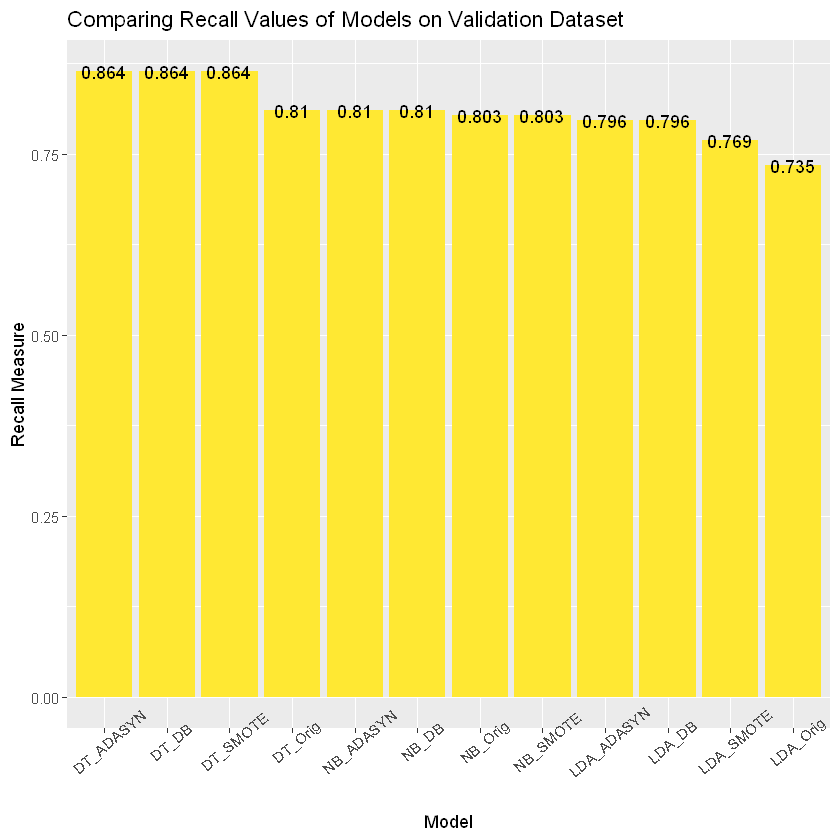

In [93]:
ggplot(aes(x=reorder(Model, -Recall), y=Recall), data=model_compare_recall) +
geom_bar(stat="identity", fill = "#FFE833") +
ggtitle("Comparing Recall Values of Models on Validation Dataset") +
xlab("Model") +
ylab("Recall Measure") +
geom_text(aes(label=round(Recall,3))) +
theme(axis.text.x=element_text(angle=40))


**Recall for the models fit to the balanced datasets are superior than those fit to the original dataset.** 

  The top 5 models with highest recall:
* Decision tree ( ADASYN, DB-SMOTE, SMOTE)
* Linear discriminant analysis-SMOTE 
* Naive bayes-ADASYN

#### Comparing precisions 

In [94]:
model_compare_precision <- data.frame(Model = c("DT_Orig", "NB_Orig", "LDA_Orig", "DT_SMOTE", "NB_SMOTE",
                                     "LDA_SMOTE", "DT_ADASYN", "NB_ADASYN", "LDA_ADASYN",
                                     "DT_DB", "NB_DB", "LDA_DB"),
                           Precision = c(precision_dt_original, precision_nb_original, precision_lda_original,
                                      precision_dt_smote, precision_nb_smote, precision_lda_smote,
                                      precision_dt_adas, precision_nb_adas, precision_lda_adas,
                                      precision_dt_db, precision_nb_db, precision_lda_db)
                           )

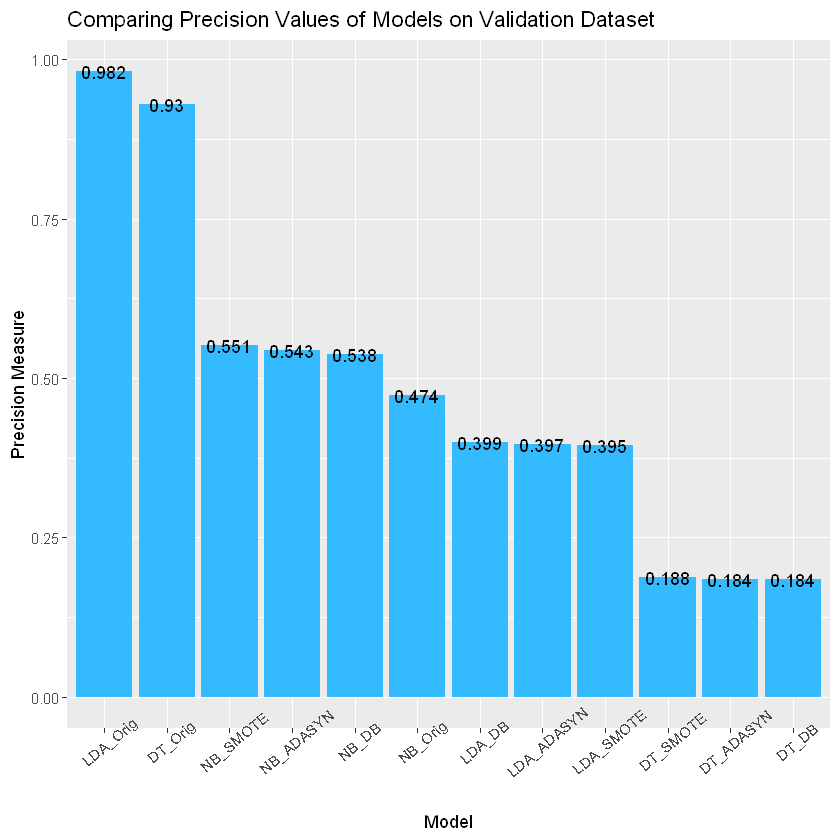

In [95]:
ggplot(aes(x=reorder(Model, -Precision), y=Precision), data=model_compare_precision) +
geom_bar(stat="identity", fill = "#33BAFF") +
ggtitle("Comparing Precision Values of Models on Validation Dataset") +
xlab("Model") +
ylab("Precision Measure") +
geom_text(aes(label=round(Precision,3))) +
theme(axis.text.x=element_text(angle=40))

The results are mixed. The models on the original unbalanced datasets have the highest precision. 

Models with top 5 precision measures:
* Linear discriminant analysis (unbalanced dataset)
* Decision tree (unbalanced dataset)
* Naive bayes (SMOTE)
* Naive Bayes (ADASYN)
* Naive bayes (DB-SMOTE)


  However, the *cost of not identifying fraudulent transactions can be very high*. 
  
  Therefore recall is the more important measure. Since recall is superior for the balanced datasets, we would still balance the datasets. 

#### Comparing $F_{1}$-scores

In [96]:
model_compare_F1 <- data.frame(Model = c("DT_Orig", "NB_Orig", "LDA_Orig", "DT_SMOTE", "NB_SMOTE",
                                     "LDA_SMOTE", "DT_ADASYN", "NB_ADASYN", "LDA_ADASYN",
                                     "DT_DB", "NB_DB", "LDA_DB"),
                           F1 = c(F1_dt_original, F1_nb_original, F1_lda_original,
                                      F1_dt_smote, F1_nb_smote, F1_lda_smote,
                                      F1_dt_adas, F1_nb_adas, F1_lda_adas,
                                      F1_dt_db, F1_nb_db, F1_lda_db)
                           )

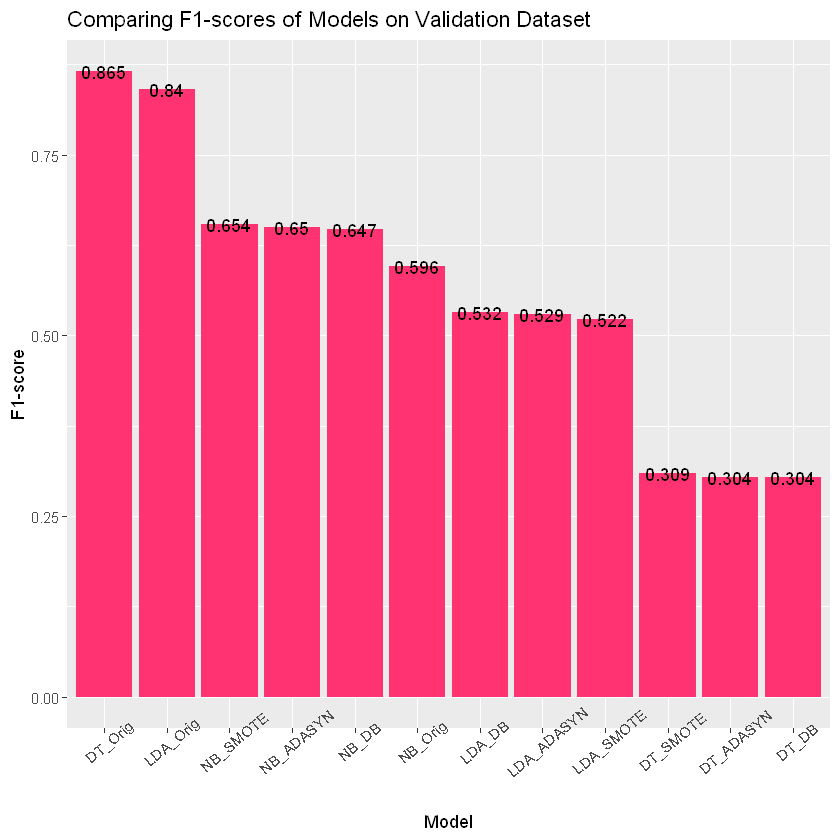

In [97]:
ggplot(aes(x=reorder(Model, -F1), y=F1), data=model_compare_F1) +
geom_bar(stat="identity", fill = "#FF3371") +
ggtitle("Comparing F1-scores of Models on Validation Dataset") +
xlab("Model") +
ylab("F1-score") +
geom_text(aes(label=round(F1,3))) +
theme(axis.text.x=element_text(angle=40))

### 11. Conclusion <a class="anchor" id="Conclusion"></a>

We have used three synthetic balancing techniques from the smotefamily library to balance an unbalanced dataset and fit three classification algorithms to each dataset. 

We observed a precision-recall tradeoff from balancing the datasets.

* The higher $F_{1}$-score for models trained on the unbalanced dataset is driven by the higher precision measure from those models. 
* Models fit to balanced datasets had higher recall values.
* In this situation recall is the most important measure to avoid costly missed classications.

If we use a model with lower recall there will be a larger number of false negatives, i.e. transactions which the model flags as non-fraudulent which were in-fact fraudulent transactions.

These missed transactions could become serious problems for the company and the account holder.
 
Flagging a non-fraudulent transaction as fraudulent would not have the same risk and cost as a missed fradulent transaction. The system could simply confirm with the account holder that the transaction was in fact theirs.
